In [57]:
# pyAPEP package import
import pyadserver.isofit as isofit
import pyadserver.simide as simide

# Data treatment package import
import numpy as np
import pandas as pd

# Data visualization package import
import matplotlib.pyplot as plt

In [49]:
# Data import
# adsorbent 1
Data_zeo13 = pd.read_csv('Example1_Zeolite13X.csv')
# adsorbent 2
Data_ac = pd.read_csv('Example1_ActivatedC.csv')
# adsorbent 3
Data_zeo5 = pd.read_csv('Example1_Zeolite5A.csv')

Data = [Data_zeo13, Data_ac, Data_zeo5]

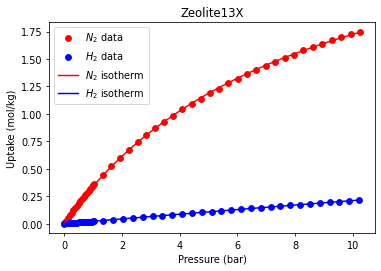

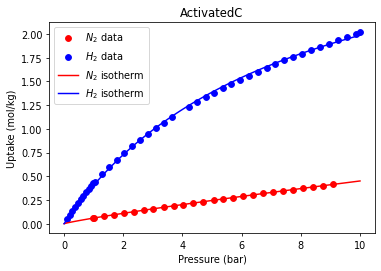

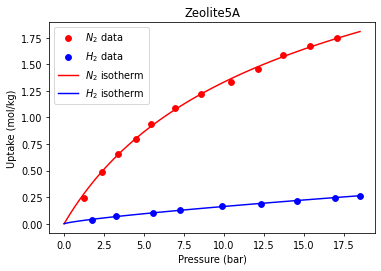

In [101]:
# Find best isotherm function
Adsorbent = ['Zeolite13X','ActivatedC', 'Zeolite5A']
pure_isotherm = []

for i in range(3):
    ads = Data[i]
    
    P_N2 = ads['Pressure_N2 (bar)'].dropna().values
    q_N2 = ads['Uptake_N2 (mol/kg)'].dropna().values

    P_H2 = ads['Pressure_H2 (bar)'].dropna().values
    q_H2 = ads['Uptake_H2 (mol/kg)'].dropna().values
    
    N2_isotherm, par_N2, fn_type_N2, val_err_N2 = isofit.best_isomodel(P_N2, q_N2)
    H2_isotherm, par_H2, fn_type_H2, val_err_H2 = isofit.best_isomodel(P_H2, q_H2)
    pure_isotherm.append([N2_isotherm,H2_isotherm])

    plt.figure(dpi=70)
    plt.scatter(P_N2, q_N2, color = 'r')
    plt.scatter(P_H2, q_H2, color = 'b')
    
    P_max= max(max(P_N2), max(P_H2))
    P_dom = np.linspace(0, P_max, 100)
    plt.plot(P_dom, pure_isotherm[i][0](P_dom), color='r' )
    plt.plot(P_dom, pure_isotherm[i][1](P_dom), color='b' )
    
    plt.xlabel('Pressure (bar)')
    plt.ylabel('Uptake (mol/kg)')
    plt.title(f'{Adsorbent[i]}')
    plt.legend(['$N_2$ data', '$H_2$ data',
                '$N_2$ isotherm','$H_2$ isotherm'], loc='best')
    
    plt.show()

In [73]:
# Develop mixture isotherm
mix_isothrm = []
for i in range(3):
    iso_mix = lambda P,T : isof.IAST([N2_isotherm,H2_isotherm], P, T)
    mix_isothrm.append(iso_mix)

In [74]:
# Ideal PSA simulation
results = []
for i in range(3):
    CI1 = simide.IdealColumn(2, mix_isothrm[i] )

    # Feed condition setting
    P_feed = 8      # Feed presure (bar)
    T_feed = 293.15    # Feed temperature (K)
    y_feed = [1/4, 3/4] # Feed mole fraction (mol/mol)
    CI1.feedcond(P_feed, T_feed, y_feed)

    # Operating condition setting
    P_high = 8 # High pressure (bar)
    P_low  = 1 # Low pressure (bar)
    CI1.opercond(P_high, P_low)

    # Simulation run
    x_tail = CI1.runideal()
    print(x_tail)       # Output: [x_H2, x_N2]
    results.append(x_tail)

ERROR: the input should be in the form of "isotherm_fun(P, T)" 


AttributeError: 'IdealColumn' object has no attribute '_n_comp'

In [ ]:


    

# # Define nitrogen isotherm (Opt. 2)
# # Data import
# par_N2 = [2, 0.2, 0.0002]

# par1 = [3, 0.1]
# par2 = [2, 0.2, 0.0002]

# def Lang(par, P, T):
#     nume = par[0]*par[1]*P
#     deno = 1 + par[1]*P
#     q = nume/deno
#     return q

# def Quad(par, P, T):
#     nume = par[0]*(par[1]*P + 2*par[2]*P**2)
#     deno = 1 + par[1]*P + par[2]*P**2
#     q = nume/deno
#     return q

# N2_isotherm = lambda P,T: Quad(par_N2, P, T)
# H2_isotherm = lambda P,T: Lang(par1, P, T)